# PERSONAL DATA

### **Saraswathi R**

Portfolio:
* [LinkedIn](https://www.linkedin.com/in/saraswathi-rajendran-29b962205/?originalSubdomain=in)
* [Github](https://github.com/shanusaras)


# DESCRIPTION

- **Online Fashion Analysis** is a data analysis project that utilizes sales data from a fashion company called **Dicoding Collection (DiCo)**. **DiCo** is an online company that produces and sells various fashion items. Recognizing the importance of data in business development, DiCo maintains comprehensive records of all sales history, product information, and customer data in their database.

- The **objective** of this project is to evaluate the company's sales performance, identify the best and worst-selling fashion products, and gain deeper insights into customer demographics. By better understanding their customers, DiCo can develop more effective marketing campaigns.

- The database consists of four main tables: **customers**, **orders**, **products**, and **sales**. [Legend](https://github.com/shanusaras/TrendTracker-Fashion_Sales_and_Customers/blob/main/dataset/Legend.txt)

- Dataset: [DicodingCollection](https://github.com/dicodingacademy/dicoding_dataset/tree/main/DicodingCollection)

Key business questions to be answered through this analysis:

1. How has the company's sales and revenue performed in recent months?
2. Which products are the best and worst sellers?
3. What are the demographic characteristics of the company's customer base?
4. When was the last time each customer made a transaction?
5. How frequently do customers make purchases in recent months?
6. How much money do customers spend on average in recent months?

# DATA WRANGLING

## Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rc('axes', grid=True)

%matplotlib inline

## Gathering Data

### Customers

In [11]:
customers_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv')
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


### Orders

In [12]:
orders_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv')
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


### Product

In [13]:
product_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv')
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


### Sales

In [14]:
sales_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv')
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


## Assessing Data

### Customers

In [15]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [16]:
customers_df.isnull().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

- The output above shows that there are 18 missing values in the gender column.

In [17]:
print('Number of duplicates in customer data: ', customers_df.duplicated().sum())

Number of duplicates in customer data:  6


In [18]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


- The output shows an inaccurate value in the maximum value of the age column: 700.00. This appears to be an outlier or data entry error, as 700 years is not a realistic age for a customer.

### Orders

In [19]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


1. **Missing Values**:
   - No missing values found in the `orders_df` dataset

2. **Data Type Issues**:
   - The `order_date` and `delivery_date` columns are currently of type **object**
   - These should be converted to **datetime** format for proper date manipulation and analysis

3. **Data Validation**:
   - Consider checking for illogical date ranges (e.g., delivery dates before order dates)
   - Verify that all dates fall within the expected business operation period

In [20]:
print('Number of duplicates in order data: ', orders_df.duplicated().sum())

Number of duplicates in order data:  0


In [21]:
orders_df.describe()

,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


No unusual values were found in the `orders_df` output above

### Product

In [22]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


In [23]:
print('Number of duplicates in product data: ', product_df.duplicated().sum())

Number of duplicates in product data:  6


In [24]:
product_df.describe()

,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


### Sales

In [25]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [26]:
sales_df.isnull().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

- The output above shows there are 19 missing values in the `total_price` column.

In [27]:
print('Number of duplicates in sale data: ', sales_df.duplicated().sum())

Number of duplicates in sale data:  0


In [28]:
sales_df.describe()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


The results above indicate there are no unusual data points in the dataset.

## Cleaning Data

### Customers

#### Drop duplicate data

In [29]:
customers_df.drop_duplicates(inplace=True)

In [30]:
print('Number of duplicates in customer data: ', customers_df.duplicated().sum())

Number of duplicates in customer data:  0


#### Handling missing values

In [31]:
# View rows containing missing value
customers_df[customers_df.gender.isnull()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


### Data Imputation Strategy:

Even though these rows contain missing values, they still hold valuable information that can be extracted. Therefore, in this case, we will use **imputation methods** to fill in the missing values.

In [32]:
customers_df.gender.value_counts()

Prefer not to say    725
Male                 143
Female               115
Name: gender, dtype: int64

In [33]:
customers_df.gender.fillna(value='Prefer not to say', inplace=True)

In [34]:
customers_df.isnull().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

In [35]:
customers_df.gender.value_counts()

Prefer not to say    743
Male                 143
Female               115
Name: gender, dtype: int64

#### Handling inaccurate values

In [36]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


The analysis suggests that the inaccurate values are likely due to **human error**, resulting in excessive zeros. To address this data quality issue, these values will be replaced with **70**, which is a more reasonable and realistic value for the given context.

**Rationale**:
- 70 is a plausible value that falls within expected ranges
- This approach preserves the data points while correcting obvious errors
- It's more statistically sound than removing the records entirely

In [37]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

In [38]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


Turns out there are still other invalid values in the age column.

The likely cause of this error is the same as before - *human error* resulting in excessive zeros. To address this, we will replace these values with **50**.

In [39]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

In [40]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


In [41]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


From these results, it's clear that the `age` column now has a reasonable maximum value. Additionally, the mean and standard deviation have changed after addressing the inaccurate values.


### Orders

- In the previous data assessment process, it was found that there are errors in the data types for the `order_date` and `delivery_date` columns.
- Both of these columns will be changed to the `datetime` data type.

In [42]:
datetime_columns = ['order_date', 'delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [43]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


### Product

- In the previous data assessment, it was found that there are 6 duplicate entries in `product_df`.
- These duplicate entries will be dropped.

In [44]:
product_df.drop_duplicates(inplace=True)

In [45]:
print('Number of duplicates in product data: ', product_df.duplicated().sum())

Number of duplicates in product data:  0


### Sales

From the previous data assessment, it can be concluded that there are 19 missing values in the `total_price` column.

In [46]:
sales_df[sales_df.total_price.isnull()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [47]:
sales_df.head(3)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0


From the data display, we can observe that the `total_price` value is obtained by multiplying `price_per_unit` by `quantity`. We can use this pattern to handle the missing values in the `total_price` column.

In [48]:
sales_df['total_price'] = sales_df['price_per_unit'] * sales_df['quantity']

In [49]:
sales_df.isnull().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

In [50]:
sales_df[sales_df['sales_id'] == 121]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
121,121,27,1027,90,3,270


# EXPLORATORY DATA ANALYSIS

## Customers

In [51]:
customers_df.describe(include='all')

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


In [52]:
customers_df.groupby(by='gender').agg({
    'customer_id': 'nunique',
    'age': ['max', 'min', 'mean', 'std']
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

In [53]:
customers_df.groupby(by='city').customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [54]:
customers_df.groupby(by='state').customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

- It appears that customer distribution is quite even across each city and state.
- The cities with the highest number of customers are East Aidan, East Sophia, and New Ava, each with three customers.
- Additionally, the state with the highest number of customers is South Australia.

## Orders

In [55]:
orders_df.head(2)

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13


Create a new column to store the delivery time for each order.

In [56]:
delivery_time = orders_df['delivery_date'] - orders_df['order_date']
delivery_time

0     25 days
1     10 days
2     26 days
3     13 days
4      1 days
        ...  
995   20 days
996   13 days
997   16 days
998   27 days
999   17 days
Length: 1000, dtype: timedelta64[ns]

In [57]:
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
delivery_time

0      2160000.0
1       864000.0
2      2246400.0
3      1123200.0
4        86400.0
         ...    
995    1728000.0
996    1123200.0
997    1382400.0
998    2332800.0
999    1468800.0
Length: 1000, dtype: float64

In [58]:
# Next, convert to days (divide by 86400)
orders_df['delivery_time'] = round(delivery_time/86_400)

In [59]:
orders_df.head(2)

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0


In [60]:
orders_df.describe(include='all')

C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\2443296560.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\2443296560.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')


,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,NaN,291,305,NaN
top,NaN,NaN,NaN,2021-06-20 00:00:00,2021-08-09 00:00:00,NaN
freq,NaN,NaN,NaN,10,9,NaN
first,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN
last,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN
mean,500.500000,506.640000,33972.936000,NaN,NaN,14.078000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225
min,1.000000,1.000000,10043.000000,NaN,NaN,1.000000
25%,250.750000,275.250000,21329.250000,NaN,NaN,8.000000


- From the output, it can be concluded that the average delivery time is **14 days**, with a maximum of **27 days** and a minimum of **1 day**.

## Orders and Customers

- In the `orders_df` data, there is a column containing information about `customer_id` of customers who have placed orders. This information can be used to identify customers who have **not** placed any orders.
- To do this, we can create a new column called `status` in the `customers_df` data.
- This `status` column will have the value `"Active"` for customers who have placed at least one order.
- Conversely, the `status` column will have the value `"Non Active"` for customers who have never placed any orders.

In [61]:
customer_id_in_orders_df = orders_df.customer_id.tolist()
customers_df['status'] = customers_df['customer_id'].apply(
    lambda x: 'Active' if x in customer_id_in_orders_df else 'Non Active'
)
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
471,471,fulan 471,Prefer not to say,31,8662 Maya PlaceApt. 834,8731,Boyerland,New South Wales,Australia,Active
326,326,fulan 326,Prefer not to say,54,624 Bode TrailSuite 795,6294,New Masonport,Northern Territory,Australia,Active
419,419,fulan 419,Male,58,31 Towne SummitSuite 671,3887,West Mackenzie,Queensland,Australia,Active
225,226,fulan 226,Prefer not to say,73,223 Jerde BoulevardSuite 636,828,Leeborough,Tasmania,Australia,Non Active
598,597,fulan 597,Prefer not to say,80,78 O'hara CircuitApt. 096,1966,Lake Michaelbury,South Australia,Australia,Active


In [62]:
customers_df.groupby(by='status').customer_id.count()

status
Active        617
Non Active    384
Name: customer_id, dtype: int64

Based on the pivot table above, it appears that there are a number of customers who have never made any transactions. This is bad news as nearly **30%** of all customers have never placed an order before.

### Merge

- Perform a merge process to combine information from both datasets.
- This will allow us to analyze the relationship between the two datasets and gain deeper insights.

In [63]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


### Number of orders by city

In [64]:
orders_customers_df.groupby(by='city').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


- Jordanside and New Ava are the two cities with the highest number of orders.

In [65]:
orders_customers_df[orders_customers_df['city'] == 'Jordanside']

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
44,45,571,21738,2021-05-30,2021-06-21,22.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active
187,188,571,41180,2021-04-10,2021-04-22,12.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active
253,254,571,57662,2021-08-07,2021-09-03,27.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active
375,376,571,15454,2021-07-04,2021-07-17,13.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active
473,474,571,17401,2021-08-19,2021-09-09,21.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active
499,500,571,41037,2021-01-15,2021-01-24,9.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active


### Number of orders by state

In [66]:
orders_customers_df.groupby(by='state').order_id.nunique().sort_values(ascending=False).reset_index()

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,129
4,Australian Capital Territory,118
5,Victoria,118
6,Tasmania,112
7,Northern Territory,106


- South Australia is the state with the highest number of orders.

### Number of orders by gender

In [67]:
orders_customers_df.groupby(by='gender').order_id.nunique().sort_values(ascending=False).reset_index()

,gender,order_id
0,Prefer not to say,725
1,Female,139
2,Male,136


- Based on the output above, most orders were made by customers who 'prefer not to say' their gender.


### Number of orders by age group

- Explore the number of orders by age group.
- To do this, we need to define a new column called `age_group`.
- This column will help us categorize customers into three groups: ***youth***, ***adults***, and ***seniors***.

In [68]:
orders_customers_df['age_group'] = orders_customers_df.age.apply(
    lambda x: 'Youth' if x <= 24 else (
        'Seniors' if x > 64 else 'Adults'
    )
)

In [69]:
orders_customers_df.groupby(by='age_group').order_id.nunique().sort_values(ascending=False).reset_index()

,age_group,order_id
0,Adults,681
1,Seniors,226
2,Youth,93


- The highest number of orders come from the `Adults` age group.

## Product and Sales

In [70]:
product_df.describe(include='all')

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


- The price of items sold ranges from **90** to **119** dollars.

In [71]:
sales_df.describe(include='all')

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


- In each transaction, customers purchase a maximum of three items (`quantity`) of a single product type, with a total price of **357** dollars.

In [72]:
product_df.sort_values(by='price', ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


- From the output above, the most expensive product is a jacket item named 'Parka', while the most affordable one is named 'Bomber'.

In [73]:
product_df.groupby(by='product_type').agg({
    'product_id': 'nunique',
    'quantity': 'sum',
    'price': ['min', 'max']
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [74]:
product_df.groupby(by='product_name').agg({
    'product_id': 'nunique',
    'quantity': 'sum',
    'price': ['min', 'max']
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

### Merge

- Merge the `product_df` and `sales_df` tables to identify the best-selling products.
- This will help us analyze sales performance and identify top-performing items.

In [75]:
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


The result of the merge process above shows a discrepancy between the values of `price_per_unit` and `price`. This difference may be caused by **discounts**, **operational costs**, and **other applicable charges**.

In [76]:
sales_product_df.groupby(by='product_type').agg({
    'sales_id': 'nunique',
    'quantity_x': 'sum',
    'total_price': 'sum'
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


- `Trousers` is the best-selling product type with `sales_id` 1683 and `quantity_x` 3360.
- However, in terms of **revenue** (`total_price`) generated, `Jacket` is the product type that contributes the most to the **company's revenue**.

In [77]:
sales_product_df.groupby(by='product_name').agg({
    'sales_id': 'nunique',
    'quantity_x': 'sum',
    'total_price': 'sum'
}).sort_values(by='total_price', ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


- The `Denim` product is the best-selling item and also contributes the most **revenue** to the company.

## Explore all_df Data

- The purpose of this step is to analyze purchasing patterns based on customer **demographics**.
- To achieve this, we will create a new DataFrame called `all_df`.
- This DataFrame will be used to merge and store all information from the four available tables.

In [78]:
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


In [79]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sales_id        5000 non-null   int64         
 1   order_id        5000 non-null   int64         
 2   product_id      5000 non-null   int64         
 3   price_per_unit  5000 non-null   int64         
 4   quantity_x      5000 non-null   int64         
 5   total_price     5000 non-null   int64         
 6   product_type    5000 non-null   object        
 7   product_name    5000 non-null   object        
 8   size            5000 non-null   object        
 9   colour          5000 non-null   object        
 10  price           5000 non-null   int64         
 11  quantity_y      5000 non-null   int64         
 12  description     5000 non-null   object        
 13  customer_id     5000 non-null   int64         
 14  payment         5000 non-null   int64         
 15  orde

In [80]:
all_df.groupby(by=['state', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

- The pivot table above provides an overview of user preferences for `product_type` by `state`.
- The `Jacket` product type has the highest sales in the states of **New South Wales**, **Queensland**, and **Tasmania**.

In [81]:
all_df.groupby(by=['gender', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

- The highest total sales were in the `Prefer not to say` category, amounting to **255,085** dollars for the **Jacket** `product_type`.


In [82]:
all_df.groupby(by=['age_group', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

- The highest total sales came from the `Adults` age group, amounting to **245,055** dollars.

# DATA VISUALIZATION

## 1st Question

How is the Sales Performance and Company Revenue in Recent Months?

1. The objective is to resample the `order_date` data into **monthly** intervals.
2. Additionally, we will perform aggregation on this data.
3. This aggregation aims to obtain information about the `number of orders` and `total revenue` for **each month**.

In [83]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    'order_id': 'nunique',
    'total_price': 'sum'
})
monthly_orders_df

,order_id,total_price
order_date,,
2021-01-31,109,119333
2021-02-28,93,95080
2021-03-31,117,131364
2021-04-30,99,97530
2021-05-31,84,85597
2021-06-30,102,101458
2021-07-31,105,116081
2021-08-31,106,104565
2021-09-30,98,96526


In [84]:
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df

,order_date,order_id,total_price
0,January,109,119333
1,February,93,95080
2,March,117,131364
3,April,99,97530
4,May,84,85597
5,June,102,101458
6,July,105,116081
7,August,106,104565
8,September,98,96526
9,October,80,84266


In [85]:
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'total_price': 'revenue'
}, inplace=True)

monthly_orders_df.head()

,order_date,order_count,revenue
0,January,109,119333
1,February,93,95080
2,March,117,131364
3,April,99,97530
4,May,84,85597


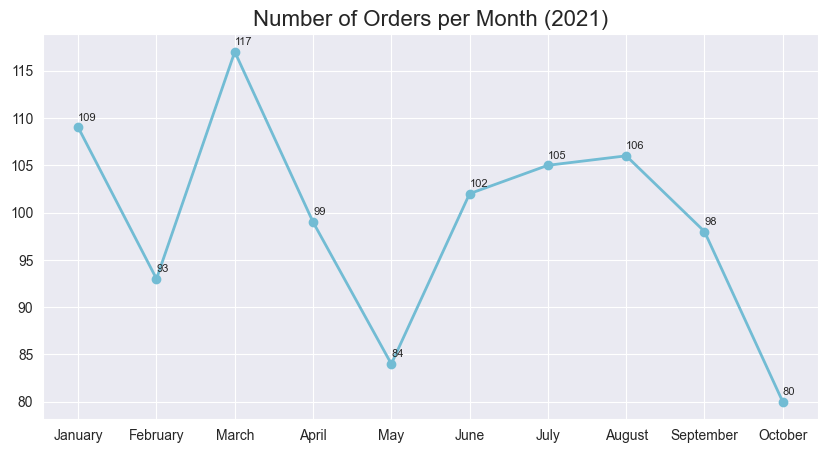

In [86]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df['order_date'],
    monthly_orders_df['order_count'],
    marker='o',
    linewidth=2,
    color='#72BCD4'
)
plt.title('Number of Orders per Month (2021)', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i in range(len(monthly_orders_df)):
    plt.text(
        monthly_orders_df['order_date'][i],
        monthly_orders_df['order_count'][i] + 0.5,
        monthly_orders_df['order_count'][i],
        ha='left',
        va='bottom',
        fontsize=8
    )

- Based on the visualization above, it can be observed that the month with the **highest** number of orders is **March**.
- Additionally, there was a significant **decrease** in the number of orders in **February, April, May, and October**.

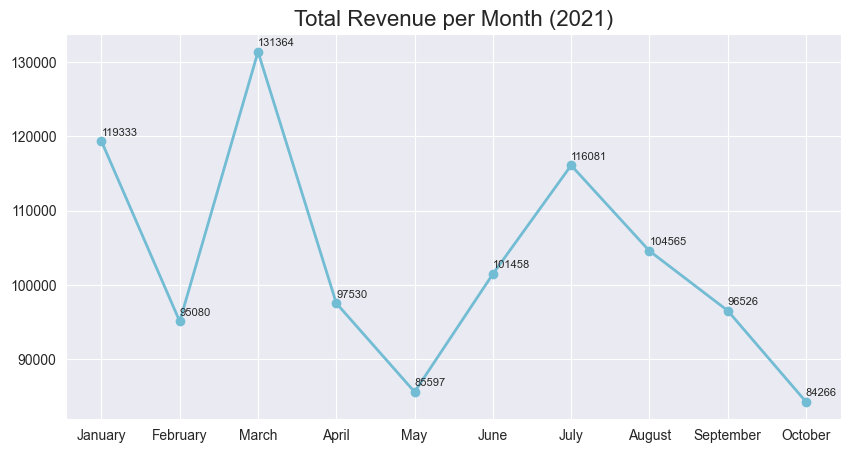

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df['order_date'],
    monthly_orders_df['revenue'],
    marker='o',
    linewidth=2,
    color='#72BCD4'
)
plt.title('Total Revenue per Month (2021)', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i in range(len(monthly_orders_df)):
    plt.text(
        monthly_orders_df['order_date'][i],
        monthly_orders_df['revenue'][i] + 500,
        monthly_orders_df['revenue'][i],
        ha='left',
        va='bottom',
        fontsize=8

    )

- There was a significant **decrease** in the number of orders in **February, April, May, and October**.
- This decline has impacted the company's revenue.
- To understand the reasons behind this decrease, further analysis is needed, considering factors such as competition, marketing campaigns, and other relevant aspects.

## 2nd Question

- Which Products Are the Best and Worst Sellers?

- The goal of this question is to identify the **best-selling** and **least-selling** products.

In [88]:
sum_order_items_df = all_df.groupby(by='product_name').quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(len(sum_order_items_df))

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\3339367112.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\3339367112.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 0.98, 'Best and Worst Performing Product by Number of Sales')

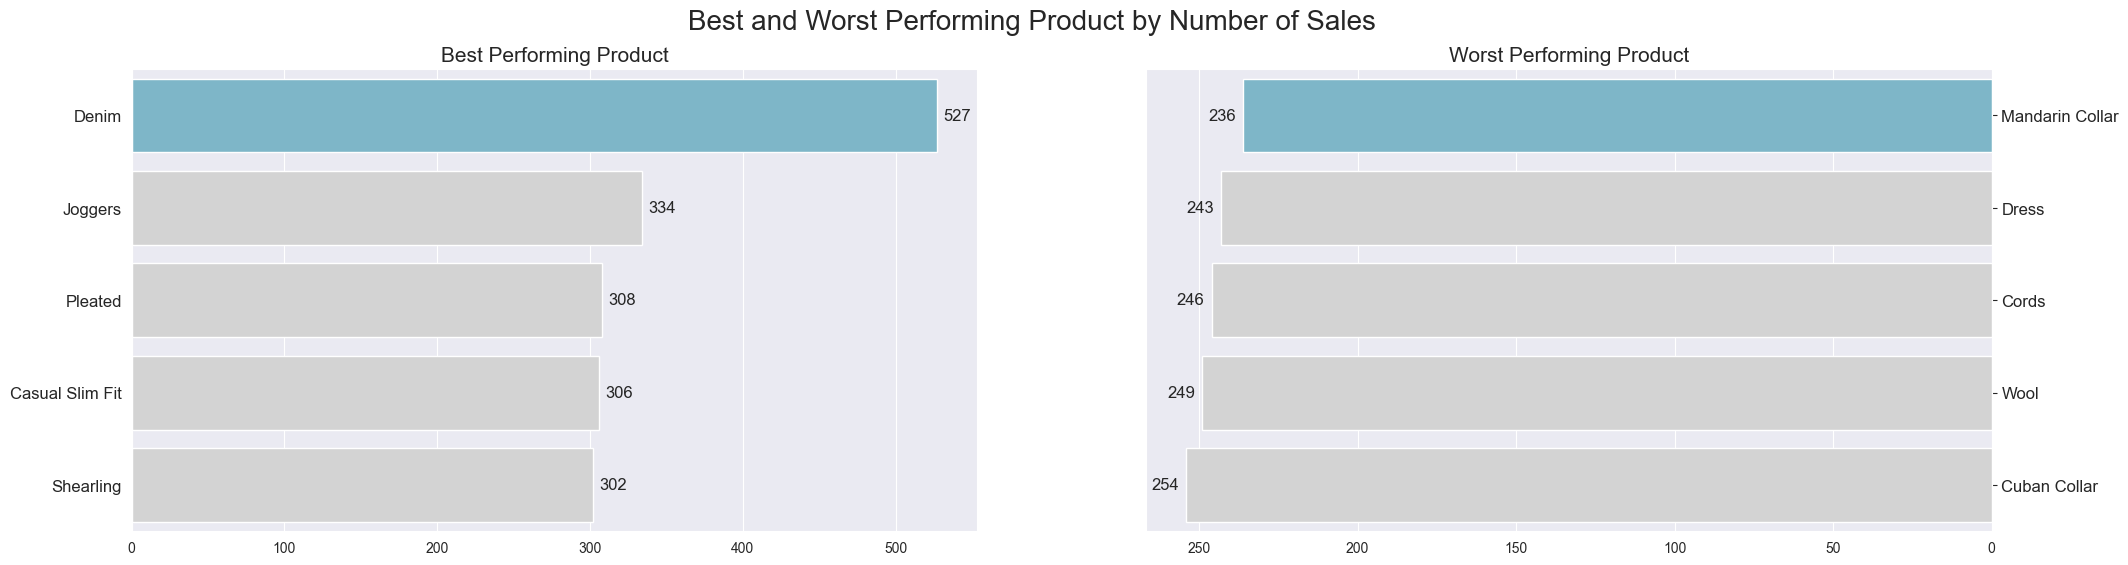

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

# Plot pertama
sns.barplot(
    x='quantity_x',
    y='product_name',
    data=sum_order_items_df.head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Best Performing Product', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

for i in range(len(sum_order_items_df.head(5))):
    ax[0].text(
        sum_order_items_df['quantity_x'].iloc[i] + 4,
        i,
        sum_order_items_df['quantity_x'].iloc[i],
        va='center',
        fontsize=12
    )

# Plot kedua
asc_sum_order = sum_order_items_df.sort_values(
    by='quantity_x', ascending=True
).head(5)

sns.barplot(
    x='quantity_x',
    y='product_name',
    data=asc_sum_order,
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Product', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

for i, value in enumerate(asc_sum_order['quantity_x']):
    ax[1].text(
        value + 11,
        i,
        value,
        va='center',
        fontsize=12
    )

plt.suptitle('Best and Worst Performing Product by Number of Sales', fontsize=20)

- Based on the image above, it can be seen that **Denim** products have the **highest** sales.
- On the other hand, **Mandarin Collar** products have the **lowest** sales.

## 3rd Question

- What is the Demographic Profile of Our Customers?

- The purpose of this question is to gather and store information about the number of customers across various demographic segments, such as gender, state, and other relevant categories.

### By gender

In [90]:
bygender_df = all_df.groupby(by='gender').customer_id.nunique().reset_index()
bygender_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

bygender_df

,gender,customer_count
0,Female,73
1,Male,82
2,Prefer not to say,461


C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\1750528484.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\1750528484.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


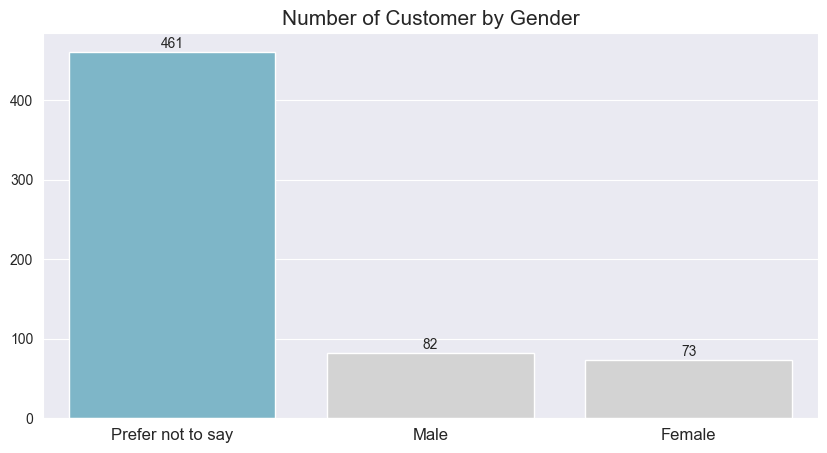

In [91]:
desc_bygender_df = bygender_df.sort_values(by='customer_count', ascending=False)

plt.figure(figsize=(10, 5))

sns.barplot(
    data=desc_bygender_df,
    y='customer_count',
    x='gender',
    palette=colors
)
plt.title('Number of Customer by Gender', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

for i, value in enumerate(desc_bygender_df['customer_count']):
    plt.text(
        i,
        value + 5,
        value,
        ha='center'
    )

- From the plot above, it can be seen that the majority of customers have not disclosed their gender information.

### By age

In [92]:
byage_df = all_df.groupby(by='age_group').customer_id.nunique().reset_index()
byage_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

byage_df

,age_group,customer_count
0,Adults,416
1,Seniors,145
2,Youth,55


C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\822250419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


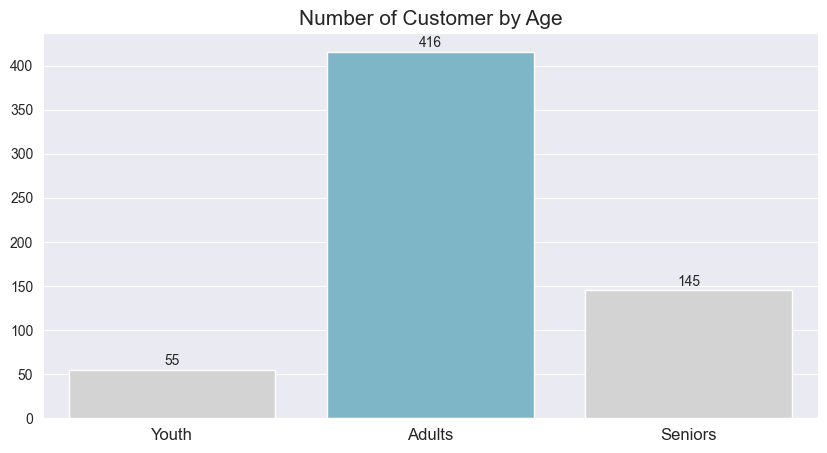

In [93]:
plt.figure(figsize=(10, 5))
colors_ = ['#D3D3D3', '#72BCD4', '#D3D3D3']

ax = sns.barplot(
    data=byage_df,
    y='customer_count',
    x='age_group',
    order=['Youth', 'Adults', 'Seniors'],
    palette=colors_
)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 1),
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('Number of Customer by Age', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

- From the plot above, the majority of customers are in the adult age group (adults).

### By state

In [94]:
bystate_df = all_df.groupby(by='state').customer_id.nunique().reset_index()
bystate_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

bystate_df

,state,customer_count
0,Australian Capital Territory,73
1,New South Wales,77
2,Northern Territory,75
3,Queensland,79
4,South Australia,90
5,Tasmania,67
6,Victoria,75
7,Western Australia,80


C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\1154857661.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


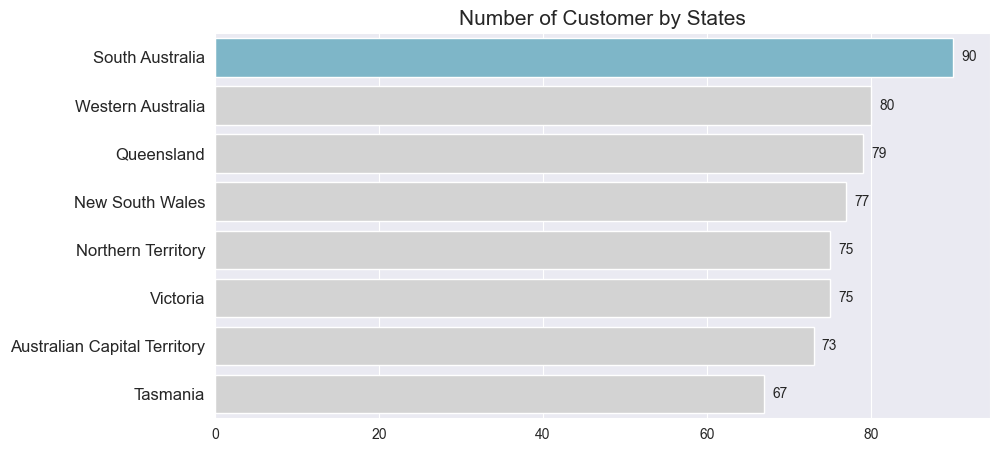

In [95]:
colors_ = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']
desc_bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=desc_bystate_df,
    x='customer_count',
    y='state',
    palette=colors_
)
plt.title('Number of Customer by States', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)

for i, value in enumerate(desc_bystate_df['customer_count']):
    plt.text(
        x=value + 1,
        y=i,
        s=value,
        va='center',
    )

- Based on the visualization above, the majority of customers are from **South Australia** state.

## RFM Analysis

To answer the last three analysis questions, we can use RFM (Recency, Frequency, Monetary) analysis. RFM analysis is a customer segmentation method based on three parameters:
- **Recency**: Parameter used to determine when a customer last made a transaction.
- **Frequency**: Parameter used to identify how often a customer makes transactions.
- **Monetary**: Parameter used to identify how much revenue is generated from each customer.

In [96]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_date': 'max', # mengambil tanggal order terakhir
    'order_id': 'nunique', # menghitung jumlah order
    'total_price': 'sum' # menghitung jumlah revenue yang dihasilkan
})

rfm_df

,customer_id,order_date,order_id,total_price
0,1,2021-04-04,3,1641
1,7,2021-05-21,1,1017
2,10,2021-03-09,1,270
3,11,2021-05-28,1,382
4,12,2021-06-19,1,1551
...,...,...,...,...
611,994,2021-01-12,1,1716
612,995,2021-08-02,1,2140
613,996,2021-09-03,2,3045
614,998,2021-07-19,4,4415


In [97]:
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']
rfm_df.head(2)

,customer_id,max_order_timestamp,frequency,monetary
0,1,2021-04-04,3,1641
1,7,2021-05-21,1,1017


In [98]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_df['order_date'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(
    lambda x: (recent_date - x).days
)

In [99]:
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


In [100]:
asc_recency_rfm_df = rfm_df.sort_values(by="recency", ascending=True).head(5)
asc_recency_rfm_df

,customer_id,frequency,monetary,recency
241,401,4,3093,0
425,687,1,1122,0
426,690,3,3693,0
98,163,3,3494,1
250,415,2,2269,1


C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\246782266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\246782266.py:7: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\246782266.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\246782266.py:30: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\shanu\AppData\Local\Temp\ipykernel_6620\246782266

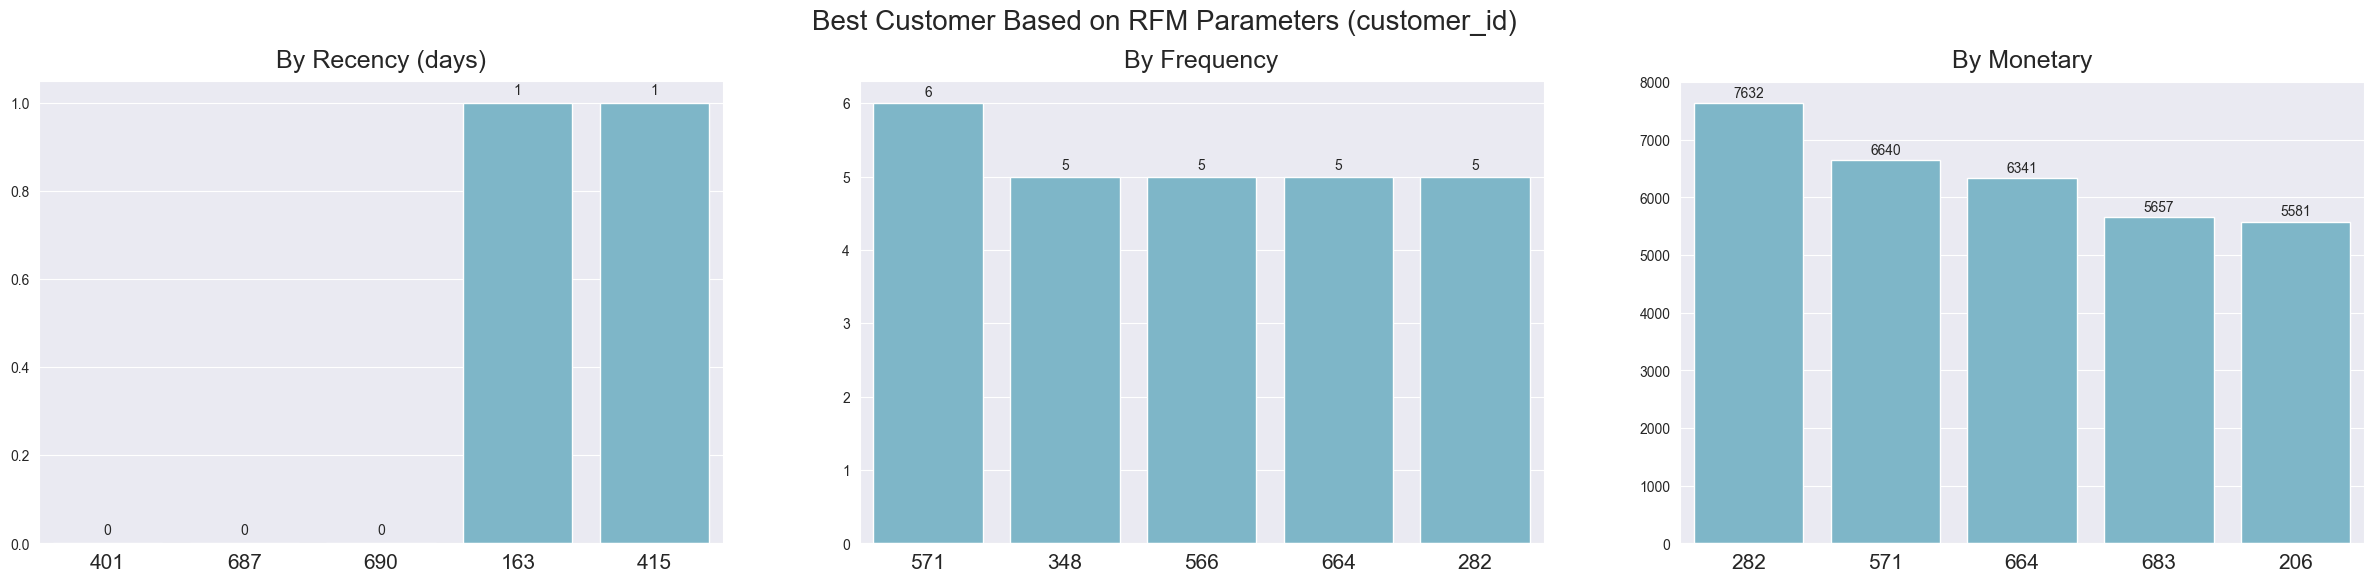

In [101]:
colors = ['#72BCD4']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Plot pertama
asc_recency_rfm_df = rfm_df.sort_values(by='recency', ascending=True).head(5)
sns.barplot(
    y='recency',
    x='customer_id',
    data=asc_recency_rfm_df,
    palette=colors,
    order=asc_recency_rfm_df['customer_id'],
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18, pad=10)
ax[0].tick_params(axis ='x', labelsize=15)

for i, value in enumerate(asc_recency_rfm_df['recency']):
    ax[0].text(
        x=i,
        y=value + 0.02,
        s=value,
        ha='center',
    )

# Plot kedua
desc_frequency_rfm_df = rfm_df.sort_values(by='frequency', ascending=False).head(5)
sns.barplot(
    y='frequency',
    x='customer_id',
    data=desc_frequency_rfm_df,
    palette=colors,
    order=desc_frequency_rfm_df['customer_id'],
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency', loc='center', fontsize=18, pad=10)
ax[1].tick_params(axis='x', labelsize=15)

for i, value in enumerate(desc_frequency_rfm_df['frequency']):
    ax[1].text(
        x=i,
        y=value + 0.1,
        s=value,
        ha='center',
    )

# Plot ketiga
desc_monetary_rfm_df = rfm_df.sort_values(by='monetary', ascending=False).head(5)
sns.barplot(
    y='monetary',
    x='customer_id',
    data=desc_monetary_rfm_df,
    palette=colors,
    order=desc_monetary_rfm_df['customer_id'],
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Monetary', loc='center', fontsize=18, pad=10)
ax[2].tick_params(axis='x', labelsize=15)

for i, value in enumerate(desc_monetary_rfm_df['monetary']):
    ax[2].text(
        x=i,
        y=value + 100,
        s=value,
        ha='center',
    )

plt.suptitle('Best Customer Based on RFM Parameters (customer_id)',
             fontsize=20, y=1);

- From the data visualization above, we can identify several customers who performed the best across all three parameters.

## Save Data Files

In [102]:
all_df.to_csv('all_data.csv', index=False)

# CONCLUSION & RECOMMENDATION

**Conclusion**

- Based on the company's **sales** and **revenue** performance in recent months, **March** had the **highest** number of orders with **117 orders**. However, there was a significant **decrease** in the number of orders during **February, April, May,** and **October**. This also impacted the company's revenue. To address this decline, further analysis is needed regarding factors such as competition and marketing campaigns.

- In terms of product sales, **Denim** products were the **best-selling** with **527 units** sold, while **Mandarin Collar** products were the **least-selling** with only **236 units** sold.

- **Customer demographics** show that the majority of **customers did not disclose** their **gender** information. However, most customers are in the **adult age group** with **416 customers**. The highest number of customers come from **South Australia**.

- Finally, customers made transactions at least **1 day ago**, with some making transactions on the **same day**. On average, a customer makes **5 to 6 purchases** in recent months. The highest spending customer spent **AUD 7,632**.

**Recommendations**

Based on these findings, the company should focus on **increasing sales** during months with order declines. Additionally, the company can expand **marketing strategies** and **identify new opportunities** to attract more customers. It's also crucial to maintain and enhance the satisfaction of existing customers by providing excellent service and high-quality products.